In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('BusTravelData.csv')

In [4]:
data.head()

,Date,Time,Day,Special,Congestion,Drving Speed,Stops,Weather,Distance,Travel Time
0,1/1/2019,6,Sunday,No,5,40,14,25,14.7,56
1,1/2/2019,7,Sunday,No,8,40,14,27,14.7,55
2,1/3/2019,8,Sunday,No,9,40,14,28,14.7,55
3,1/4/2019,9,Sunday,No,7,40,14,29,14.7,56
4,1/5/2019,10,Sunday,No,6,40,14,29,14.7,56


In [5]:
data.tail()

,Date,Time,Day,Special,Congestion,Drving Speed,Stops,Weather,Distance,Travel Time
595,8/18/2020,6,Monday,No,9,40,12,25,12.1,49
596,8/19/2020,6,Monday,No,3,40,12,25,12.1,40
597,8/20/2020,12,Monday,No,5,40,12,25,12.1,43
598,8/21/2020,12,Monday,No,9,40,12,25,12.1,49
599,8/22/2020,12,Monday,No,3,40,12,25,12.1,40


In [6]:
data.shape

(600, 10)

In [7]:
print("Number of rows",data.shape[0])
print("Number of columns",data.shape[1])

Number of rows 600
Number of columns 10


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          600 non-null    object 
 1   Time          600 non-null    int64  
 2   Day           600 non-null    object 
 3   Special       600 non-null    object 
 4   Congestion    600 non-null    int64  
 5   Drving Speed  600 non-null    int64  
 6   Stops         600 non-null    int64  
 7   Weather       600 non-null    int64  
 8   Distance      600 non-null    float64
 9   Travel Time   600 non-null    int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 47.0+ KB


In [9]:
data.describe()

,Time,Congestion,Drving Speed,Stops,Weather,Distance,Travel Time
count,600.000000,600.000000,600.0,600.000000,600.000000,600.00000,600.000000
mean,12.546667,6.253333,40.0,12.000000,27.000000,12.40400,49.786667
std,5.184524,2.035369,0.0,4.033251,1.961227,4.05381,17.968470
min,6.000000,2.000000,40.0,0.000000,25.000000,1.20000,3.000000
25%,7.000000,5.000000,40.0,12.000000,25.000000,12.10000,43.000000
50%,12.000000,6.000000,40.0,14.000000,27.000000,14.70000,56.000000
75%,17.000000,8.000000,40.0,14.000000,29.000000,14.70000,56.000000
max,22.000000,9.000000,40.0,14.000000,30.000000,14.70000,75.000000


In [10]:
data['Day'].unique()

array(['Sunday', 'Monday', 'Tuesday'], dtype=object)

In [11]:
data['Day'].map({'Sunday':0,'Monday':1,'Tuesday':2})

0      0
1      0
2      0
3      0
4      0
      ..
595    1
596    1
597    1
598    1
599    1
Name: Day, Length: 600, dtype: int64

In [12]:
data['Day'] = data['Day'].map({'Sunday':0,'Monday':1,'Tuesday':2})

In [13]:
data.head()

,Date,Time,Day,Special,Congestion,Drving Speed,Stops,Weather,Distance,Travel Time
0,1/1/2019,6,0,No,5,40,14,25,14.7,56
1,1/2/2019,7,0,No,8,40,14,27,14.7,55
2,1/3/2019,8,0,No,9,40,14,28,14.7,55
3,1/4/2019,9,0,No,7,40,14,29,14.7,56
4,1/5/2019,10,0,No,6,40,14,29,14.7,56


In [14]:
data['Special'] = data['Special'].map({'No':0,'Yes':1})

In [15]:
data.tail()

,Date,Time,Day,Special,Congestion,Drving Speed,Stops,Weather,Distance,Travel Time
595,8/18/2020,6,1,0,9,40,12,25,12.1,49
596,8/19/2020,6,1,0,3,40,12,25,12.1,40
597,8/20/2020,12,1,0,5,40,12,25,12.1,43
598,8/21/2020,12,1,0,9,40,12,25,12.1,49
599,8/22/2020,12,1,0,3,40,12,25,12.1,40


In [16]:
data['Weather'].unique()

array([25, 27, 28, 29, 30, 26], dtype=int64)

In [17]:
data.columns

Index(['Date', 'Time', 'Day', 'Special', 'Congestion', 'Drving Speed', 'Stops',
       'Weather', 'Distance', 'Travel Time'],
      dtype='object')

In [18]:
X = data.drop(['Date','Travel Time'],axis=1)


In [19]:
y = data['Travel Time']


Train/test split

1. split data into two parts 

    training data set
    testing data set

2. Train the models on training set

3. Test the models on testing data set

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [22]:
y_train

145    49
9      56
375    56
523    49
188    56
       ..
71     40
106    73
270    56
435    34
102    56
Name: Travel Time, Length: 480, dtype: int64

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier


In [24]:
lr = LinearRegression()
NN = MLPClassifier()
lr.fit(X_train,y_train)
NN.fit(X_train,y_train)

C:\Users\Shiv\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [25]:
y_pred1 = lr.predict(X_test)

In [26]:
df1 = pd.DataFrame({'Actual':y_test, 'Lr Results':y_pred1})

In [27]:
df1

,Actual,Lr Results
110,55,56.187653
419,56,55.732541
565,56,53.591764
77,55,56.690085
181,73,66.133304
...,...,...
399,56,54.599261
340,56,53.591764
148,49,52.322530
494,56,55.732541


In [28]:
y_pred2 = NN.predict(X_test)
df2 = pd.DataFrame({'Actual':y_test, 'NN Results':y_pred2, 'LR Results':y_pred1})
df2

,Actual,NN Results,LR Results
110,55,55,56.187653
419,56,56,55.732541
565,56,56,53.591764
77,55,55,56.690085
181,73,73,66.133304
...,...,...,...
399,56,56,54.599261
340,56,56,53.591764
148,49,49,52.322530
494,56,56,55.732541


In [29]:
import matplotlib.pyplot as plt

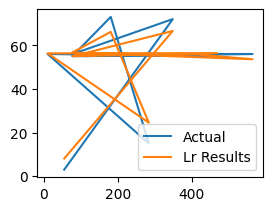

In [30]:
plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['Lr Results'].iloc[0:11],label='Lr Results')
plt.legend()

	Time	Day	Rush	Special	Congestion	Drving Speed	Stops	Weather	Distance	Travel Time

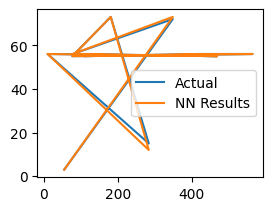

In [31]:
plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df2['NN Results'].iloc[0:11],label='NN Results')
plt.legend()

Prediction with Current parameters (Predict Time with trained Model)

In [32]:
data = {'Time':6,
        'Day':1,
        'Special':0,
        'Congestion':8,
        'Drving Speed':40,
        'Stops':14,
        'Weather':23,
        'Distance':14.7
        }
df = pd.DataFrame(data,index=[0])
df


,Time,Day,Special,Congestion,Drving Speed,Stops,Weather,Distance
0,6,1,0,8,40,14,23,14.7


In [33]:
new_pred = lr.predict(df)
NN_pred = NN.predict(df)
print('linear regression',new_pred)
print('Neural Network',NN_pred)
print('Actual Travel Time :- 58')

linear regression [61.09983093]
Neural Network [55]
Actual Travel Time :- 58


Testing With Current Data

In [34]:
data = {'Time':17,
        'Day':1,
        'Special':0,
        'Congestion':5,
        'Drving Speed':40,
        'Stops':20,
        'Weather':24,
        'Distance':14.7
        }
ddf = pd.DataFrame(data,index=[0])
ddf

,Time,Day,Special,Congestion,Drving Speed,Stops,Weather,Distance
0,17,1,0,5,40,20,24,14.7


In [35]:
resultsNN = NN.predict(ddf)
resultsNN
print('Travel Time Prediction :-',*resultsNN,'Min')

Travel Time Prediction :- 56 Min


In [36]:
def GetPrediction(time,date,special,congestion,dspeed,stops,weather,distance):
    data = {'Time':time,
        'Day':date,
        'Special':special,
        'Congestion':congestion,
        'Drving Speed':dspeed,
        'Stops':stops,
        'Weather':weather,
        'Distance':distance
        }
    ddf = pd.DataFrame(data,index=[0])
    resultsNN = NN.predict(ddf)
    resultsNN
    print('Travel Time Prediction :-',*resultsNN,'Min')

In [40]:
def GetDateCode(date):
    if('Sunday' == date ):
        return 0
    elif('Monday' == date):
        return 1
    elif('Tuesday' == date):
        return 2
    elif('Wednesday' == date):
        return 3
    elif('Thursday' == date):
        return 4
    elif('Friday' == date):
        return 5
    elif('Saturday' == date):
        return 6
    else:
        return 9
    

 
time= 6  #this time come from semins data/member of route planning
day ='Friday'  #date come from UI 
date = GetDateCode(day)
special = 0 # Special Day or Not 1/0
Congestion= 8 # This is depend on the depature time---- heavy traffic =9 / No Traffic = 0 
drivingspeedAVG = 40 #this is come from GPS data
stops =14 #total Bus stops/holts between the travel --- data come from the Seminas data/member of route planning 
weather =23  #Get weather in travel area


GetPrediction(time,date,special,Congestion,drivingspeedAVG,14,24,14.7)

Travel Time Prediction :- 55 Min
